## Renato Tapia (2020-2021) - Statistical Analysis

##### Objective of the study: Analyze the statistics of Renato Tapia's performance during La Liga Santander 2020-2021. Data source: FBRef.com

#### Dynamic of the study

Renato Tapia was labeled as the best player for Celta de Vigo, a humble mid-lower spanish club, in several occassions by the fans. In this opportunity, I'm going to compare his stats to 5 of the TOP defensive midfielders of La Liga according to the press in the 20-21 season: Carlos Enrique Casemiro, Fernando, Sergio Busquets, William Carvalho and Igor Zubeldia.

In [25]:
#### import libraries
import pandas as pd
import numpy as np


#### load the Dataset
df = pd.read_csv("cdm_dataset.csv")

## Strength 1: Tackles

###### Definition of Tackle: "the act of a defender coming to meet an opponent who is in possession of the ball, engaging him, and then legally using a foot to take the ball away".


In [17]:
df.groupby(by=["Player"])[["Overall_Tkl", "Overall_TklW",  "Tkl_Def_3rd", "Tkl_Mid_3rd", "Tkl_Att_3rd", "Dri_Tkl%", "Dri_TklAtt"]].mean().sort_values(by=["Dri_Tkl%"], ascending=False)

,Overall_Tkl,Overall_TklW,Tkl_Def_3rd,Tkl_Mid_3rd,Tkl_Att_3rd,Dri_Tkl%,Dri_TklAtt
Player,,,,,,,
Igor Zubeldia,23.0,16.0,15.0,8.0,0.0,57.1,14.0
Fernando,54.0,28.0,24.0,25.0,5.0,53.5,43.0
Casemiro,84.0,49.0,50.0,30.0,4.0,45.2,73.0
Renato Tapia,93.0,44.0,50.0,34.0,9.0,38.6,83.0
Sergio Busquets,63.0,35.0,21.0,29.0,13.0,35.5,76.0
William Carvalho,19.0,12.0,7.0,11.0,1.0,23.8,21.0


In [13]:
# We need to get the data per game by dividing the values with the 90s variable.
# we are also going to exclude the "Dri_tkl%" since it's a percentile representation.

list_Tkl = ["Overall_Tkl", "Overall_TklW",  "Tkl_Def_3rd", "Tkl_Mid_3rd", "Tkl_Att_3rd", "Dri_TklAtt"]
list_Tkl_90 = ["Overall_Tkl_90", "Overall_TklW_90",  "Tkl_Def_3rd_90", "Tkl_Mid_3rd_90", "Tkl_Att_3rd_90", "Dri_TklAtt_90"]

data = {"Player": ["Renato Tapia", "Casemiro", "Sergio Busquets", "Fernando", "Igor Zubeldia", "William Carvalho"]}
df_90s = pd.DataFrame(data)

counter = 0

while counter < len(list_Tkl):
    df_90s[list_Tkl_90[counter]] = df[list_Tkl[counter]] / df["90s"]
    counter += 1    

In [20]:
# add interceptions per 90 to the dataset 
df_90s["Interceptions_90"] = df["Interceptions"] / df["90s"]
df_90s["Tkl+Int_90"] = df["Tkl+Int"] / df["90s"]

In [19]:
# So now we can use the groupby function to see the rankings 

df_90s.groupby(by=["Player"])[["Overall_Tkl_90", "Overall_TklW_90",  "Tkl_Def_3rd_90", "Tkl_Mid_3rd_90", "Tkl_Att_3rd_90", "Dri_TklAtt_90"]].mean().sort_values(by=["Overall_Tkl_90"], ascending=False)

,Overall_Tkl_90,Overall_TklW_90,Tkl_Def_3rd_90,Tkl_Mid_3rd_90,Tkl_Att_3rd_90,Dri_TklAtt_90
Player,,,,,,
Renato Tapia,3.100000,1.466667,1.666667,1.133333,0.300000,2.766667
Sergio Busquets,2.608696,1.521739,1.552795,0.931677,0.124224,2.267081
Fernando,2.250000,1.250000,0.750000,1.035714,0.464286,2.714286
Casemiro,1.908127,0.989399,0.848057,0.883392,0.176678,1.519435
Igor Zubeldia,1.397059,0.882353,0.514706,0.808824,0.073529,1.544118
William Carvalho,1.055046,0.733945,0.688073,0.366972,0.000000,0.642202


### Strenght 2: Blocks

###### Definition of Blocks: when a player obstructs a shot or pass initialize by an opposing player

In [23]:
list_block = ["Blocks", "Block_Sh", "Bloc_Pass"]
list_block_90s = ["Blocks_90", "Block_Sh_90", "Block_Pass_90"]

counter = 0

while counter < len(list_block):
    df_90s[list_block_90s[counter]] = df[list_block[counter]] / df["90s"]
    counter += 1    

In [24]:
df_90s.groupby(by=["Player"])[["Blocks_90", "Block_Sh_90",  "Block_Pass_90"]].mean().sort_values(by=["Blocks_90"], ascending=False)

,Blocks_90,Block_Sh_90,Block_Pass_90
Player,,,
Renato Tapia,1.866667,0.433333,1.433333
Sergio Busquets,1.552795,0.527950,1.024845
Fernando,0.964286,0.142857,0.821429
William Carvalho,0.917431,0.596330,0.321101
Casemiro,0.883392,0.388693,0.494700
Igor Zubeldia,0.808824,0.220588,0.588235


In [29]:
# export the dataset to a final csv file
df_90s.to_csv("cdm_90_dataset.csv", index=False)
df_90s.to_excel("cdm_90_dataset.xlsx")

## Viz

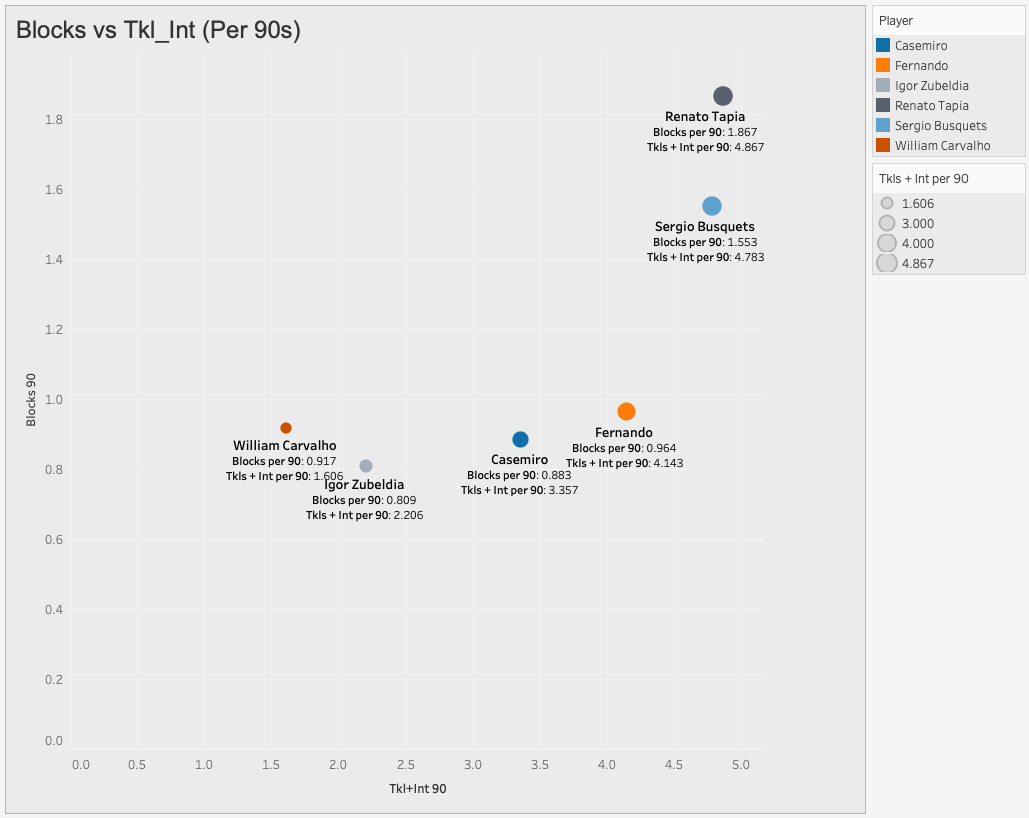

### Observations

- When it comes to the success rate in Tackle vs Dribbles, Tapia is better than Busquets and Carvalho, still behind Zubeldia, Fernando and Casemiro.
- When it comes to the amount of tackles per 90 minutes, Tapia leads by difference. 
- Tapia also is on top when it comes to tackles won per 90 minutes, only outperformed by Busquets.
- We also see the Tapia has a high number of Tackles in both the defensive and mid 3rd of the field, in which he outperforms Busquets and is again on top in both zones.
- We can argue that Tapia is a blocking specialist, accounting with a total of 1.87 blocks per game, outperforming by difference the other players.